**24BAD128 - EXP 2**\
**SCENARIO 1 – Linear, Ridge & Lasso Regression (Temperature Prediction)**

**Explanation:**

1. The program loads ocean dataset (bottle.csv) using Pandas.

2. Selected features:

    Depthm

    Salnty (Salinity)

    O2ml_L (Oxygen level)

3. Target variable: T_degC (Temperature).

4. Missing values are removed for clean data.

**Steps Performed:**

1. Features and target are separated.

2. Data is scaled using StandardScaler.

3. Dataset is divided into training (80%) and testing (20%).

4. Linear Regression model is trained.

5. Predictions are made and performance is evaluated.

**Evaluation Metrics:**

1. MSE – prediction error.

2. RMSE – square root of error.

3. R² Score – model accuracy.

**Plots:**

1. Actual vs Predicted Plot: compares real and predicted temperature.

2. Residual Plot: checks prediction errors.

**Additional Models:**

1. Ridge Regression: reduces overfitting using regularization.

2. Lasso Regression: performs feature selection by shrinking coefficients.

24BAD128-Vibusha.G-Scenario 1
LINEAR REGRESSION RESULTS
MSE : 3.790981736154531
RMSE: 1.94704435906184
R²  : 0.7876170657606347


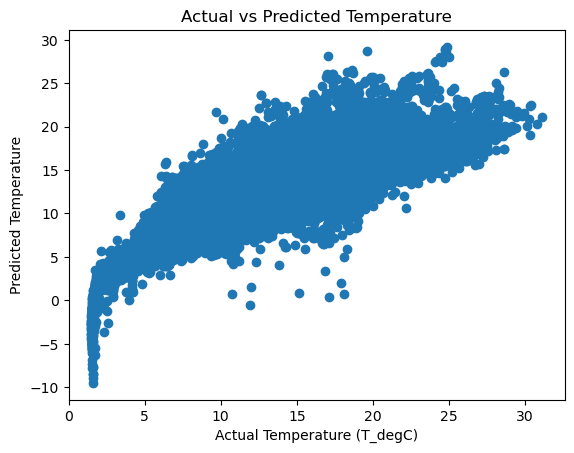

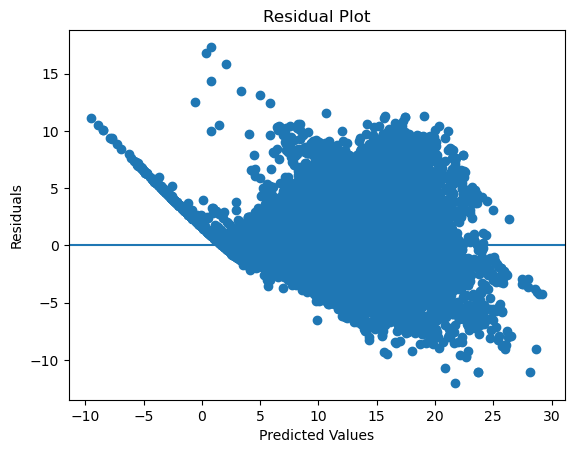

Ridge R²: 0.7876170446099516
Lasso R²: 0.7874996600741913


In [ ]:
#24BAD128-Vibusha.G-Scenario 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("24BAD128-Vibusha.G-Scenario 1")

path=r"C:\Users\vibusha\Downloads\archive\bottle.csv"
data = pd.read_csv(path, low_memory=False)

features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = data[features + [target]].copy()

# Remove missing values (safe & simple)
df.dropna(inplace=True)

# Split features and target
X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("LINEAR REGRESSION RESULTS")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

# Actual vs Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature (T_degC)")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, lasso_pred))


**SCENARIO 2 – Logistic Regression (Stock Price Movement Prediction)**

**Explanation:**

1. Stock market dataset (LICI data) is loaded.

2. Column names are cleaned for easy access.

3. A new column price_movement is created:

    1 → price increased

    0 → price decreased

**Features Used:**

1. Open price

2. High price

3. Low price

4. Volume

**Steps Performed:**

1. Missing values replaced using mean.

2. Features scaled using StandardScaler.

3. Data split into training and testing sets.

4. Logistic Regression model trained.

**Evaluation Metrics:**

1. Accuracy – overall correctness.

2. Precision – correct positive predictions.

3. Recall – ability to detect positives.

4. F1 Score – balance of precision & recall.

**Visualizations:**

1. Confusion Matrix: shows correct and incorrect predictions.

2. ROC Curve: evaluates classification performance.

3. Feature Importance Graph: shows most influential features.

24BAD128-Vibusha.G-Scenario 1


C:\Users\vibusha\AppData\Local\Temp\ipykernel_26600\1841649439.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


LOGISTIC REGRESSION RESULTS
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594


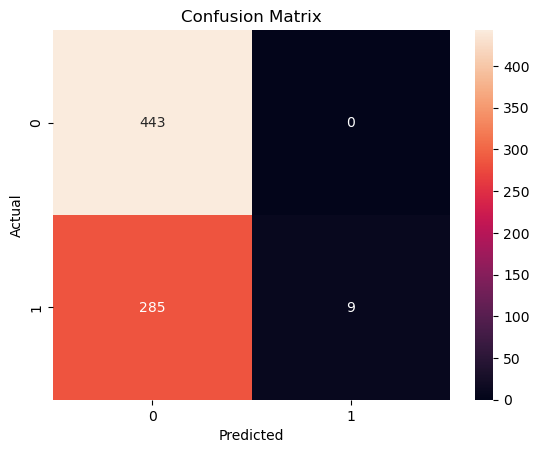

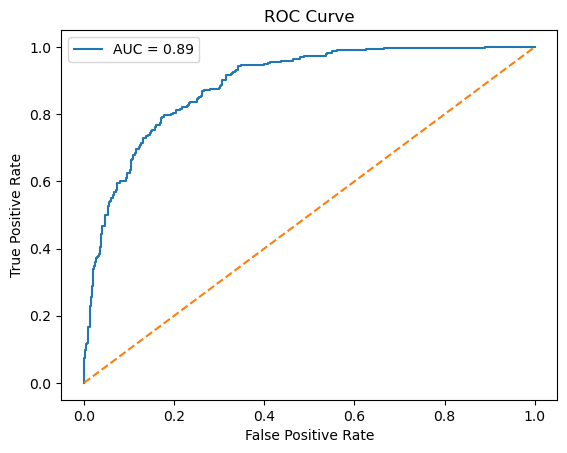

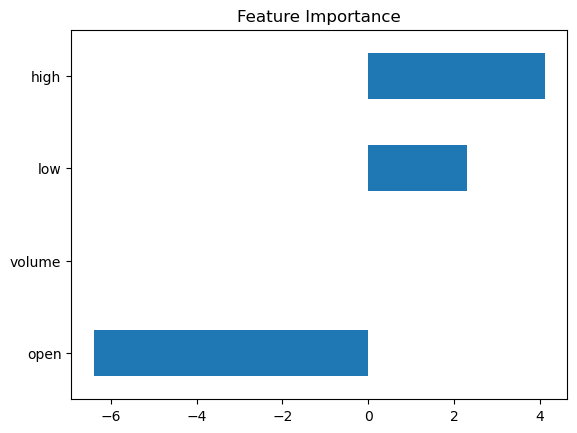

In [ ]:
#24BAD128-Vibusha.G-Scenario 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

print("24BAD128-Vibusha.G-Scenario 1")

path=r"C:\Users\vibusha\Downloads\LICI - 10 minute data.csv"
data = pd.read_csv(path)

data.columns = data.columns.str.strip().str.lower()

open_col  = [c for c in data.columns if 'open' in c][0]
close_col = [c for c in data.columns if 'close' in c or 'ltp' in c][0]
high_col  = [c for c in data.columns if 'high' in c][0]
low_col   = [c for c in data.columns if 'low' in c][0]
vol_col   = [c for c in data.columns if 'vol' in c][0]

data['price_movement'] = np.where(
    data[close_col] > data[open_col], 1, 0
)

features = [open_col, high_col, low_col, vol_col]
X = data[features]
y = data['price_movement']

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("LOGISTIC REGRESSION RESULTS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance
importance = pd.Series(
    model.coef_[0], index=features
).sort_values()

importance.plot(kind='barh')
plt.title("Feature Importance")
plt.show()
